In [4]:
import os
import numpy as np
import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from manipulate_videos import Videos


['dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce',
 'dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce',
 'dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce',
 'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce',
 'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce']

In [ ]:
# base folder
folder_base = Path(__file__).parent.parent if "__file__" in globals() else Path.cwd().parent
folder_base = os.path.join(folder_base, 'project_data')

# mice/recording folders
all_recording_folders = os.listdir(folder_base)

# get usefull paths and files
recording  = []
file = []
label = []
valid_frames = []

for recording_folder in all_recording_folders:
    path_to_recording_folder = os.path.join(folder_base, recording_folder)
    path_to_videos = os.path.join(folder_base, recording_folder,'data','videos')
    video_files = glob.glob(os.path.join(path_to_videos,'*.npy'))
    print(f"Recording {recording_folder} - {len(video_files)} files found\nn")

    for video_file in tqdm(video_files):

        # initialize class and load video
        video = Videos(path_to_recording_folder, video_file)

        # find peaks
        video.find_peaks()

        # find segments
        video.describe_segments()

        # classify
        video.classify()

        # store
        recording.append(video.recording)
        file.append(video.file_name)
        label.append(video.label)
        valid_frames.append(video.valid_frames)


df = pd.DataFrame({'recording':recording, 
                   'file':file, 
                   'label':label,
                   'valid_frames':valid_frames,
                   })

Recording dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce - 704 files found
n


100%|██████████| 704/704 [00:58<00:00, 12.06it/s]


Recording dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce - 720 files found
n


100%|██████████| 720/720 [00:59<00:00, 12.05it/s]


Recording dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce - 729 files found
n


100%|██████████| 729/729 [00:58<00:00, 12.46it/s]


Recording dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce - 714 files found
n


100%|██████████| 714/714 [01:01<00:00, 11.62it/s]


Recording dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce - 723 files found
n


100%|██████████| 723/723 [01:00<00:00, 11.99it/s]


In [3]:
# Extract the mouse id
df["recording_short"] = df["recording"].str.extract(r'dynamic\d+-(\d+-\d+)-Video')

# Create a unique column combining recording_short, file and label
df["unique_label"] = df["recording_short"] + "_" + df["file"].str.replace(".npy", "") + "_" + df["label"]

df
#print(df[["recording", "file", "label", "unique_label"]])


,recording,file,label,valid_frames,recording_short,unique_label
0,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,407.npy,NaturalVideo,300,2-10,2-10_407_NaturalVideo
1,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,379.npy,NaturalVideo,300,2-10,2-10_379_NaturalVideo
2,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,18.npy,NaturalVideo,300,2-10,2-10_18_NaturalVideo
3,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,270.npy,NaturalVideo,300,2-10,2-10_270_NaturalVideo
4,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,241.npy,NaturalVideo,300,2-10,2-10_241_NaturalVideo
...,...,...,...,...,...,...
3585,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,478.npy,NaturalVideo,300,2-9,2-9_478_NaturalVideo
3586,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,418.npy,NaturalVideo,300,2-9,2-9_418_NaturalVideo
3587,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,97.npy,Gabor,300,2-9,2-9_97_Gabor
3588,dynamic29514-2-9-Video-8744edeac3b4d1ce16b6809...,210.npy,NaturalVideo,300,2-9,2-9_210_NaturalVideo


label
NaturalVideo     2673
RandomDots        218
NaturalImages     178
GaussianDot       177
Gabor             176
PinkNoise         168
Name: count, dtype: int64


/tmp/ipykernel_1916752/4091549391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


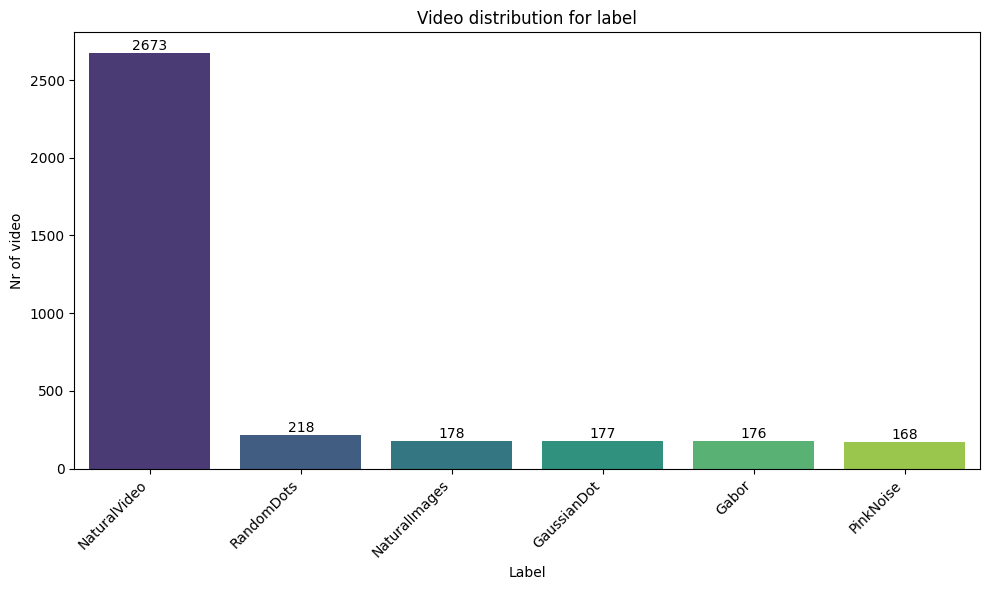

In [8]:
counts = df["label"].value_counts()
print(counts)
# Plot with labels
plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

plt.title("Video distribution for label")
plt.ylabel("Nr of video")
plt.xlabel("Label")
plt.xticks(rotation=45, ha="right")  


for i, v in enumerate(counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [6]:
df_unknown = df[df["label"] == "unknown"]
print(df_unknown)



                                              recording   file    label  \
2780  dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...  5.npy  unknown   

      valid_frames recording_short   unique_label  
2780           300             3-5  3-5_5_unknown  


In [7]:
#label the unknown video after inspecting it
idx = 2780  #line to change

# label change
df.loc[idx, 'label'] = 'NaturalVideo'

# regenerate the unique_label
file_no_ext = df.loc[idx, 'file'].replace('.npy', '')
df.loc[idx, 'unique_label'] = f"{df.loc[idx, 'recording_short']}_{file_no_ext}_NaturalVideo"


In [9]:
df.to_csv("classification_table.csv")